# The Battle of the neighborhoods


## Business Problem
#### The Outdoor Recreation and Professional Services Inc is located in Rosedale, Downtown Tornoto. The client had a successful run in the present neighborhood of the Toronto City. They offer outdoor activity and recreation products and services to their customer.

Now with its existing business maturing in Rosendale, they would like to expand their operations in another neighborhood.

The bulk of the clients existing business comes from the venues in the existing neighborhood. The client's business operating model is therefore proven and as such the client wants to reduce the risk and accentuate the possibility of success by investing in neighborhoods with similar venue profile.

The objective therefore is to facilitate the client’s selection of the neighborhoods by proposing neighborhoods that are similar to the present one.


## Part 1: Creation of the dataframe from the Wikipedia web page

In [1]:
#Import the relevant packages for the assignment

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#! conda install -c conda-forge folium
import folium

# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans


In [2]:
#Scrape the data in Table in the following Wikipedia page and create the dataframe of neighborhoods in Toronto

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

#Read HTML tables into a ``list`` of ``DataFrame`` objects.
raw_html_tbl_list = pd.read_html(url)

#raw_html_tbl_list is the list of tables read from the wikipedia page
df_neighborhoods = raw_html_tbl_list[0]

#Renamed the column names to match those mentined in the assignment
df_neighborhoods.columns = ['PostalCode','Borough','Neighborhood']

#Retain only the Borough's which have assigned values. Removed the rows with value "Not assigned"
df_neighborhoods = df_neighborhoods[df_neighborhoods['Borough'] != 'Not assigned'].reset_index(drop=True)

#Checked the dataframe. There is no duplicate value for M5A or any other Postal Code. Harbourfront and Regent Park are already meged
df_neighborhoods.duplicated('PostalCode').sum()  

df_neighborhoods.head()


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [3]:
#Get the number of rows and columns from the data frame using its shape attribute
df_neighborhoods.shape


(103, 3)

## Part 2: Enrich the data frame with the latitude and longitude.

 Download the csv file and get the geo coordinated for each of the Postal Code

In [4]:
#create a data frame containing the geocodes for the postal codes by reading in the csv
df_geo_coord = pd.read_csv('http://cocl.us/Geospatial_data',index_col=None)

#Rename column Postal Code to PostalCode for consistency and use in the subjsequent merge condition
df_geo_coord.rename(columns=({'Postal Code':'PostalCode'}),inplace=True)
df_geo_coord.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [5]:
#df_neighborhoods.join(df_geo_coord, on='PostalCode', how='left'

df_merged = pd.merge(df_neighborhoods,df_geo_coord,on='PostalCode')
df_merged.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


## Part 3: Explore and cluster the neighborhoods of Toronto


In [6]:
#Check and confirm that the data frame doesn't have for null cells 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
PostalCode      103 non-null object
Borough         103 non-null object
Neighborhood    103 non-null object
Latitude        103 non-null float64
Longitude       103 non-null float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


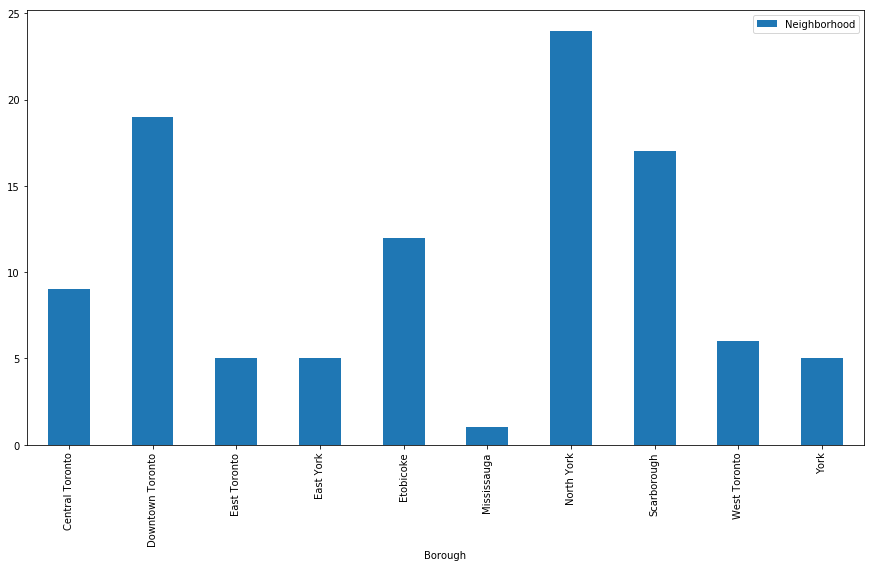

In [7]:
#Visulaize the number of neighborhoods by Borough
df_merged[['Borough', 'Neighborhood']].groupby('Borough').count().plot(kind='bar',figsize=(15,8))

In [8]:
#Plot all the 'Neighborhoods' on the Map
location = [43.6532,-79.3832]
m = folium.Map(location=location,zoom_start=11)

for i in df_merged.itertuples():
    folium.Marker(location=[i.Latitude,i.Longitude],
            popup=i.Neighborhood,
                  radius = 5,
                  color='blue',
                  fill=True,
                  fill_color='#3186cc',
                  fill_opacity=0.7).add_to(m)
    
m

In [9]:
#Copy the mergerd dataframe into a new df_toronto data frame

df_toronto = df_merged.copy()
df_toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


#### Define Foursquare Credentials and Version

In [10]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 0GSPO3GEBMTB3KN0J1TRSU1TAGU1LQMAVCNQ5WFKCSZBNIJA
CLIENT_SECRET:DK21CHGLPBCYCNY4OXE5OU0MTOJIDCCXU1J0QUG2WWJ4E03F


Create the GET request URL to use the explore endpoint of the Foursquare api.

In [11]:
#Define url to explore a location

latitude = 43.6532
longitude = -79.3832

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)


In [12]:
#Testinng the results from a single neighborhood
results = requests.get(url).json()

Define and test the function to get the category type of an individual  venue. 

#### Creation of the function to take series of names, geo cordinates(lat and long series) and radius as inputs and return the dataframe containing the relevant details of the associations venues, their coordinates and category. 

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
#Creation of the toronto venues data frame to receive the output from the above defined function

toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

Size of the resulting dataframe

In [15]:
print(toronto_venues.shape)
toronto_venues.head()

(1325, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Brookbanks Pool,43.751389,-79.332184,Pool
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


Count of the venues returned for each neighborhood

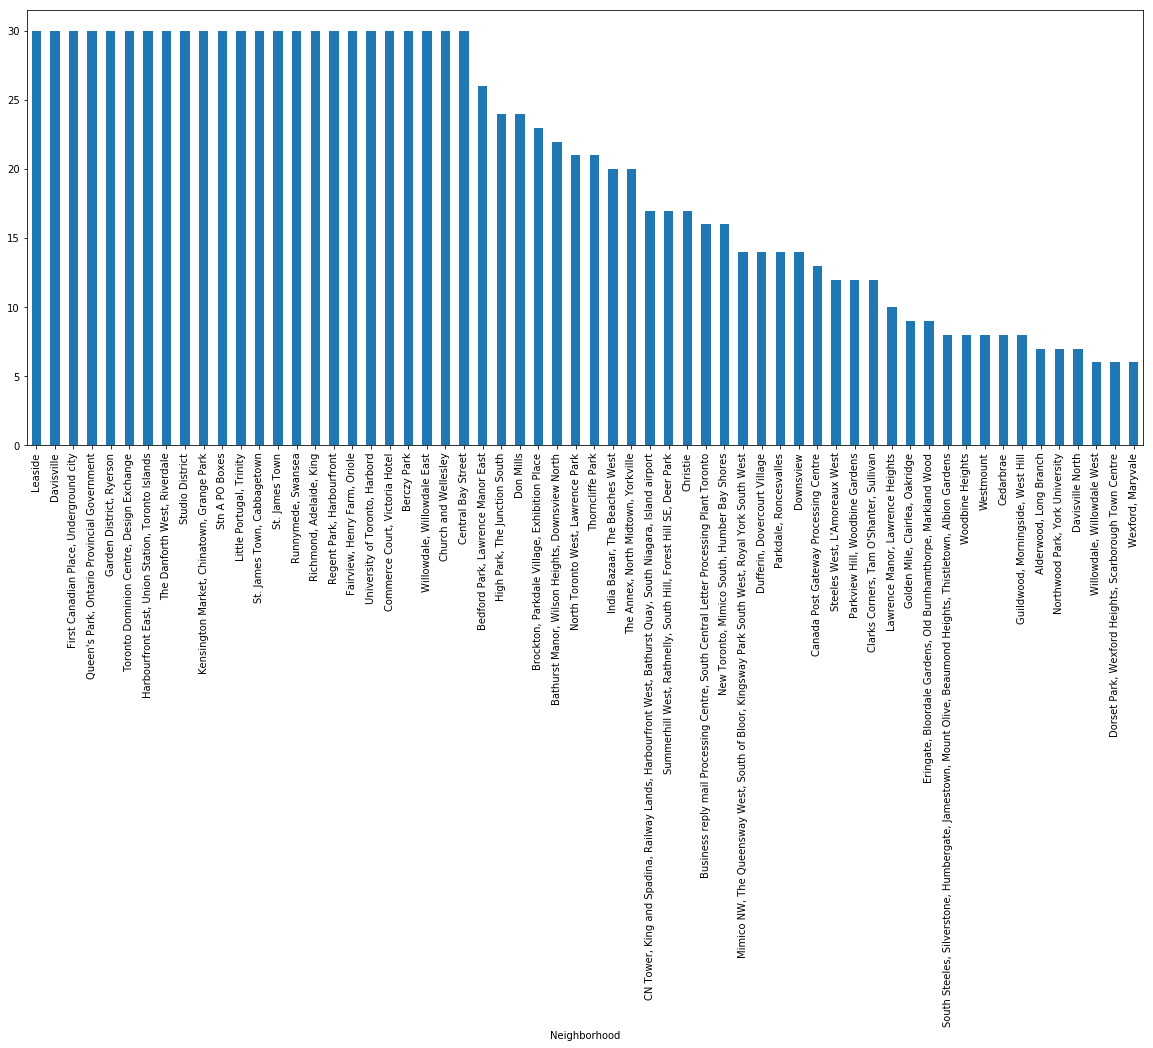

In [16]:
# Neighborhoods with the highest Venues


Neighborhoods_with_Highest_number_of_venues = toronto_venues[['Neighborhood', 'Venue', 'Venue Category']].groupby('Neighborhood').count()
Neighborhoods_with_Highest_number_of_venues.sort_values(by='Venue', ascending=False, inplace=True)
Neighborhoods_with_Highest_number_of_venues['Venue'].head(60).plot(kind='bar', figsize=(20,8))



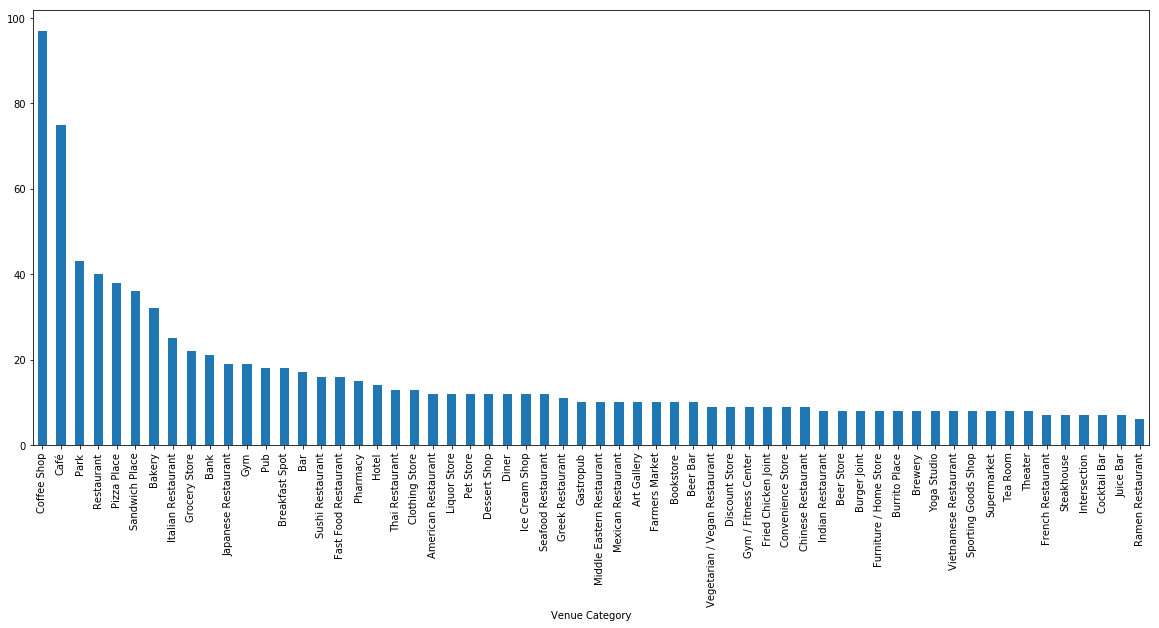

In [17]:
Highest_number_of_venue_categories = toronto_venues[['Neighborhood', 'Venue', 'Venue Category']].groupby('Venue Category')['Venue'].count()
Highest_number_of_venue_categories.sort_values(ascending=False, inplace=True)
Highest_number_of_venue_categories.head(60).plot(kind='bar',figsize=(20,8))

#### Number of unique categories can be curated from all the returned venues

In [18]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


#### Analysis of  Each Neighborhood

In [19]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# move neighborhood column to the first column
all_columns = list(toronto_onehot.columns.values)
all_columns.remove('Neighborhood')
fixed_columns = ['Neighborhood']+all_columns
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
toronto_onehot.shape

(1325, 233)

#### Compute the mean of the frequency of occurrence of each category by grouping rows by neighborhood and by taking the mean

In [21]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
1,"Alderwood, Long Branch",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
3,Bayview Village,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
4,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
5,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
6,"Birch Cliff, Cliffside West",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
8,"Business reply mail Processing Centre, South C...",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,0.0,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000


Size of the transformed data frame

In [22]:
toronto_grouped.shape

(95, 233)

#### Print of the top 5 most common venues for each neighborhood

In [23]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Agincourt----
                       venue  freq
0                     Lounge   0.2
1             Breakfast Spot   0.2
2  Latin American Restaurant   0.2
3             Clothing Store   0.2
4               Skating Rink   0.2


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.29
1           Gym  0.14
2   Coffee Shop  0.14
3  Skating Rink  0.14
4           Pub  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
           venue  freq
0    Coffee Shop  0.09
1           Bank  0.09
2      Pet Store  0.05
3    Gas Station  0.05
4  Shopping Mall  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1   Chinese Restaurant  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4        Movie Theater  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.12
1      Sandwich Place  0.08
2          Restaurant  0.08
3         Coffee Shop  0.08
4   Indian Restaurant  0.04

#### Put that into a pandas dataframe

In [24]:
#funtion to sort venues in dexcending order 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
#Dta frame o get the top venues for each of the Neighborhoods

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Skating Rink,Clothing Store,Breakfast Spot,Lounge,Yoga Studio,Deli / Bodega,Drugstore,Donut Shop,Dog Run
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Gym,Skating Rink,Sandwich Place,Pub,Dessert Shop,Dance Studio,Deli / Bodega,Department Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Shopping Mall,Pizza Place,Supermarket,Ice Cream Shop,Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Deli / Bodega
3,Bayview Village,Chinese Restaurant,Bank,Japanese Restaurant,Café,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Grocery Store,Thai Restaurant,Liquor Store,Juice Bar,Indian Restaurant,Fast Food Restaurant


## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [26]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

New dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [27]:
# add clustering labels at the first column
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.drop(toronto_merged.index[[5,52,64,95]], inplace=True)

toronto_merged# check the last columns!


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Park,Pool,Food & Drink Shop,Yoga Studio,Curling Ice,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Coffee Shop,Intersection,Portuguese Restaurant,French Restaurant,Hockey Arena,Yoga Studio,Dim Sum Restaurant,Deli / Bodega,Department Store,Dessert Shop
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Restaurant,Pub,Chocolate Shop,Performing Arts Venue,Mexican Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Furniture / Home Store,Clothing Store,Accessories Store,Coffee Shop,Miscellaneous Shop,Boutique,Event Space,Vietnamese Restaurant,Donut Shop,Dog Run
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Diner,College Auditorium,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Yoga Studio,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner
7,M3B,North York,Don Mills,43.745906,-79.352188,1.0,Gym,Restaurant,Japanese Restaurant,Coffee Shop,Beer Store,Chinese Restaurant,Dim Sum Restaurant,Café,Italian Restaurant,Caribbean Restaurant
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,1.0,Pizza Place,Pharmacy,Athletics & Sports,Fast Food Restaurant,Intersection,Bank,Café,Breakfast Spot,Gym / Fitness Center,Pet Store
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1.0,Café,Tea Room,Theater,Clothing Store,Ramen Restaurant,Pizza Place,Steakhouse,Fast Food Restaurant,Sporting Goods Shop,Plaza
10,M6B,North York,Glencairn,43.709577,-79.445073,1.0,Park,Playground,Japanese Restaurant,Pub,Bakery,Dance Studio,Drugstore,Donut Shop,Dog Run,Distribution Center


Visulization of the Clusters

In [48]:
# create map
toronto_location = [43.6532,-79.3832]
map_clusters = folium.Map(location=toronto_location, zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine each of the Clusters

Cluster 1

In [29]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724,0.0,Golf Course,Yoga Studio,Curling Ice,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner


Cluster 2

In [30]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Coffee Shop,Intersection,Portuguese Restaurant,French Restaurant,Hockey Arena,Yoga Studio,Dim Sum Restaurant,Deli / Bodega,Department Store,Dessert Shop
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Restaurant,Pub,Chocolate Shop,Performing Arts Venue,Mexican Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Furniture / Home Store,Clothing Store,Accessories Store,Coffee Shop,Miscellaneous Shop,Boutique,Event Space,Vietnamese Restaurant,Donut Shop,Dog Run
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Diner,College Auditorium,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Park
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Yoga Studio,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner
7,M3B,North York,Don Mills,43.745906,-79.352188,1.0,Gym,Restaurant,Japanese Restaurant,Coffee Shop,Beer Store,Chinese Restaurant,Dim Sum Restaurant,Café,Italian Restaurant,Caribbean Restaurant
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,1.0,Pizza Place,Pharmacy,Athletics & Sports,Fast Food Restaurant,Intersection,Bank,Café,Breakfast Spot,Gym / Fitness Center,Pet Store
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1.0,Café,Tea Room,Theater,Clothing Store,Ramen Restaurant,Pizza Place,Steakhouse,Fast Food Restaurant,Sporting Goods Shop,Plaza
10,M6B,North York,Glencairn,43.709577,-79.445073,1.0,Park,Playground,Japanese Restaurant,Pub,Bakery,Dance Studio,Drugstore,Donut Shop,Dog Run,Distribution Center
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1.0,Golf Course,Bar,Home Service,Yoga Studio,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center


Cluster 3

In [31]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,M9M,North York,"Humberlea, Emery",43.724766,-79.532242,2.0,Paper / Office Supplies Store,Baseball Field,Yoga Studio,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,2.0,Baseball Field,Yoga Studio,Deli / Bodega,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store


Cluster 4

In [32]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3.0,Playground,Yoga Studio,Curling Ice,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner


Cluster 5

In [33]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,Park,Pool,Food & Drink Shop,Yoga Studio,Curling Ice,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
35,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,4.0,Park,Convenience Store,Rental Car Location,Yoga Studio,Curling Ice,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
61,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,4.0,Park,Swim School,Bus Line,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center
66,M2P,North York,York Mills West,43.752758,-79.400049,4.0,Park,Convenience Store,Yoga Studio,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
68,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,4.0,Park,Jewelry Store,Trail,Sushi Restaurant,Yoga Studio,Dance Studio,Drugstore,Donut Shop,Dog Run,Distribution Center
83,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,4.0,Park,Trail,Yoga Studio,Curling Ice,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
85,M1V,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,4.0,Playground,Park,Yoga Studio,Curling Ice,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner
91,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,4.0,Park,Playground,Trail,Yoga Studio,Curling Ice,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store


## As the client is located in Rosedale, recommendations on similar neighnorhoods are as provided below:

In [34]:
#The exisiting establishment is part of the Cluster 4. Therefore the neighborhoods in Cluster 4 are possible locations that can be postioned with the client

shortlisted_neighborhoods = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4][['PostalCode', 'Borough', 'Neighborhood']].reset_index(drop=True)
shortlisted_neighborhoods_list = shortlisted_neighborhoods['Neighborhood']
print(' The following neighborhoods are recommended to the client:')
for n, hood in enumerate(shortlisted_neighborhoods_list):
    if hood != "Rosedale":
        print('Proposed Location',n+1,'  ', hood)

    

 The following neighborhoods are recommended to the client:
Proposed Location 1    Parkwoods
Proposed Location 2    East Toronto, Broadview North (Old East York)
Proposed Location 3    Lawrence Park
Proposed Location 4    York Mills West
Proposed Location 5    Forest Hill North & West, Forest Hill Road Park
Proposed Location 6    Moore Park, Summerhill East
Proposed Location 7    Milliken, Agincourt North, Steeles East, L'Amoreaux East


In [46]:
recommended_locations = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

In [47]:
#Plot all the 'Neighborhoods' on the Map
location = [43.679563,-79.377529]
m = folium.Map(location=location,zoom_start=11)

for i in recommended_locations.itertuples():
    if i.Neighborhood != "Rosedale":
        
        folium.CircleMarker(location=[i.Latitude,i.Longitude],
                popup=i.Neighborhood,
                      radius = 5,
                      color='green',
                      fill=True,
                      fill_color='#3186cc',
                      fill_opacity=0.7).add_to(m)
    
folium.Marker(location=[i.Latitude,i.Longitude],
        popup='Rosedale',
                radius = 5,
                color='yellow',
                fill=True,
                fill_color='yellow',
                fill_opacity=0.5).add_to(m)
m

# Neighborhoods recommended for the next business Location:

    1. Parkwoods
    2. East Toronto, Broadview North (Old East York)
    3. Lawrence Park
    4. York Mills West
    5. Forest Hill North & West, Forest Hill Road Park
    6. Moore Park, Summerhill East
    7. Milliken, Agincourt North, Steeles East, L'Amoreaux East
    